In [1]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
sdata = pickle.load(open("../data/empirical/subject_1_experiment.pkl", 'rb'))
# data = pd.read_csv("../data/empirical/subject_1_experiment.pkl", encoding='unicode_escape')

In [2]:
for key in sdata.keys():
    try:
        sdata[key] = np.vsplit(sdata[key], sdata[key].shape[0])
    except:
        sdata[key] = list(sdata[key])
    print(key, len(sdata[key]))

Acc_Left_Thigh 1331415
Gyr_Left_Thigh 1331415
Label 1331416


In [3]:
del sdata['Label'][-1]

In [4]:
sdata = pd.DataFrame(sdata)

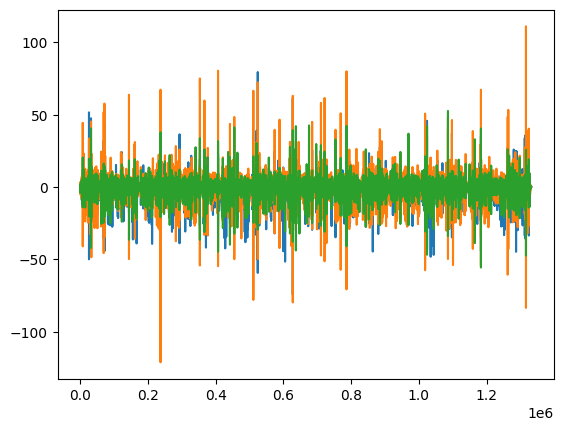

In [5]:
arr = sdata['Acc_Left_Thigh']
for dim in range(3):
    plt.plot([arr[idx][0, dim] for idx in range(len(arr))])

In [6]:
sdata

,Acc_Left_Thigh,Gyr_Left_Thigh,Label
0,"[[-0.05349662642444747, 1.1943718182928418, -0...","[[-0.3505286231463331, -0.4894097765952079, -0...",1.0
1,"[[-0.027661857528974983, 1.1702537328921974, -...","[[-0.3597790577853093, -0.4921772174106162, -0...",1.0
2,"[[-0.0023060605590442713, 1.1575362657962986, ...","[[-0.36885166457887775, -0.4947377468175473, -...",1.0
3,"[[0.016965758228341822, 1.1544549321526372, -0...","[[-0.37794873457235334, -0.49697014652860827, ...",1.0
4,"[[0.025358723638841354, 1.1555368603034806, -0...","[[-0.38714335790012805, -0.49878304795634465, ...",1.0
...,...,...,...
1331410,"[[-0.05946034470068047, 0.08875492769317384, 0...","[[0.02984614634421731, 0.015453483394951208, 0...",1.0
1331411,"[[-0.061352836105224705, 0.11962658851057609, ...","[[0.02874303975335408, 0.014659084025585956, 0...",1.0
1331412,"[[-0.059102988393153866, 0.14497352999108876, ...","[[0.027876860784987842, 0.013814442407305635, ...",1.0
1331413,"[[-0.05451786009838028, 0.15619877828681156, 0...","[[0.027138312909187445, 0.01306691126730981, 7...",1.0


In [23]:
all_acc = np.vstack(sdata["Acc_Left_Thigh"])

<Figure size 1000x800 with 0 Axes>

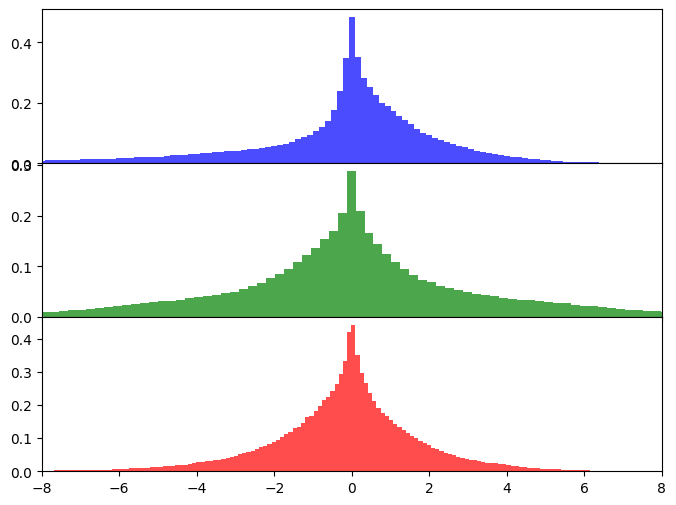

In [26]:
plt.figure(figsize=(10, 8))
# Create the ridgeline plot
fig, axes = plt.subplots(3, 1, figsize=(8, 6), sharex=True)
axes[0].set_xlim([-8, 8])

# Plot histograms for each dimension
axes[0].hist(all_acc[:, 0], bins=1000, alpha=0.7, color='blue', density=True)
axes[1].hist(all_acc[:, 1], bins=1000, alpha=0.7, color='green', density=True)
axes[2].hist(all_acc[:, 2], bins=1000, alpha=0.7, color='red', density=True)

# Remove space between subplots
plt.subplots_adjust(hspace=0)

plt.show()

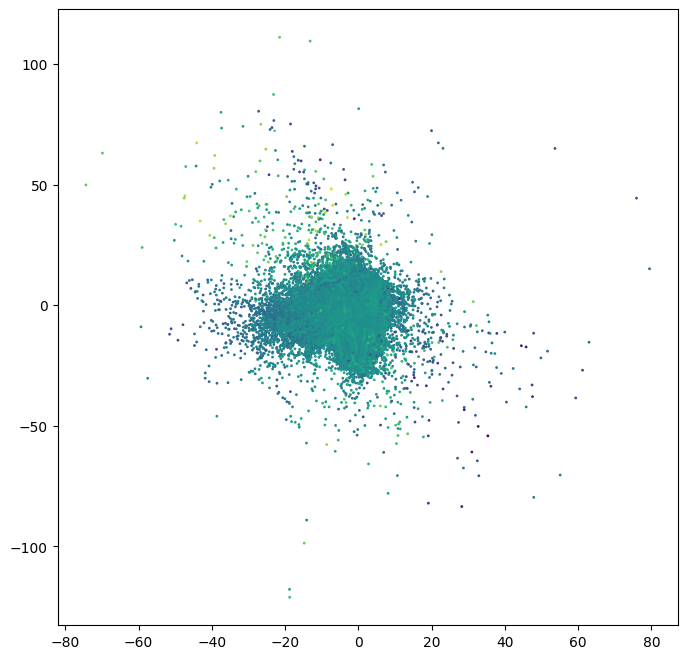

In [27]:
plt.figure(figsize=(8, 8))
plt.scatter(all_acc[:, 0], all_acc[:, 1], c=all_acc[:, 2], cmap='viridis', alpha=1, s=1)

In [165]:
from sklearn.mixture import GaussianMixture as GMM

model = GMM(n_components = 6).fit(all_acc)

In [166]:
model.means_

array([[ 0.44671756, -0.0783573 , -0.10126585],
       [ 1.52734978,  5.28604351,  0.36524354],
       [-0.00098489,  0.03505619,  0.01032895],
       [-4.63898318, -5.10642793, -1.68188758],
       [ 0.40741141, -1.80215707, -0.03018773],
       [-2.81335539,  1.45687293, -0.69836913]])

In [167]:
model.covariances_

array([[[  0.74553709,  -0.30135675,   0.0377688 ],
        [ -0.30135675,   2.07428719,  -0.34041934],
        [  0.0377688 ,  -0.34041934,   1.15326759]],

       [[  2.46465933,   2.89520154,  -1.7192164 ],
        [  2.89520154,   7.19041218,  -5.23354568],
        [ -1.7192164 ,  -5.23354568,   6.28545902]],

       [[  0.0428913 ,  -0.04038477,  -0.02002373],
        [ -0.04038477,   0.2554011 ,   0.00175633],
        [ -0.02002373,   0.00175633,   0.08927372]],

       [[ 56.04216849, -13.89568821,   7.92276093],
        [-13.89568821, 108.81637138,  -5.24476828],
        [  7.92276093,  -5.24476828,  39.83182316]],

       [[  4.38057522,   0.092898  ,   0.6215452 ],
        [  0.092898  ,  11.21711563,   1.42357089],
        [  0.6215452 ,   1.42357089,   2.9611228 ]],

       [[ 12.49329275,   2.04053546,   1.95872134],
        [  2.04053546,  13.76372303,  -3.19921366],
        [  1.95872134,  -3.19921366,   6.80534248]]])

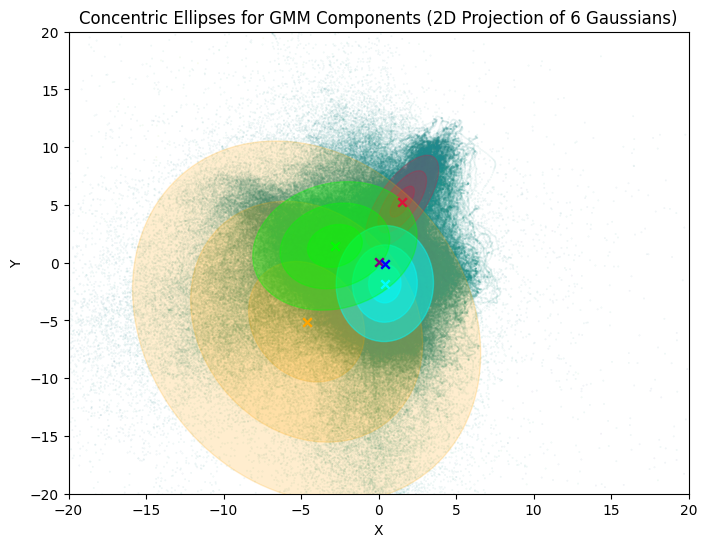

In [168]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from scipy.stats import multivariate_normal

# Example 3D data (replace with your actual data)
np.random.seed(42)
data = all_acc

# Function to plot confidence ellipses
def plot_ellipse(mean, cov, ax, n_std=2, color='blue', alpha=0.3, zorder=0):
    """Plot an ellipse representing the confidence region of a 2D Gaussian."""
    # Compute eigenvalues and eigenvectors of the covariance matrix
    eigvals, eigvecs = np.linalg.eigh(cov)
    
    # Compute the angle of the ellipse
    angle = np.degrees(np.arctan2(eigvecs[1, 0], eigvecs[0, 0]))
    
    # Compute the width and height of the ellipse
    width, height = n_std * np.sqrt(eigvals)
    
    # Plot the ellipse
    from matplotlib.patches import Ellipse
    plt.scatter(*mean, c=color, marker='x', zorder=1000, alpha=0.8)
    ellipse = Ellipse(mean, width, height, angle=angle, color=color, alpha=alpha, zorder=zorder)
    ax.add_patch(ellipse)

# Create a plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the data points
plt.scatter(data[:, 0], data[:, 1], c=data[:, 2], cmap='viridis', alpha=0.1, s=0.1)

cols = ['blue', 'crimson', 'purple', 'orange', 'cyan', 'lime', 'orangered', 'gold']
# Plot concentric ellipses for each GMM component
for i in range(model.n_components-1, -1, -1):
    # Extract 2D mean and covariance (x and y components)
    mean_2d = model.means_[i, :2]
    cov_2d = model.covariances_[i][:2, :2]
    weight = model.weights_[i]
    
    # Plot ellipses for 1σ, 2σ, and 3σ confidence levels
    for n_std, alpha in zip([1, 2, 3], [1, 1, 1]):
        plot_ellipse(mean_2d, cov_2d, ax, n_std=n_std, color=cols[i], alpha=(weight + 0.2) / (np.sum(model.weights_) + 0.2), zorder=i)

# Add labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title(f'Concentric Ellipses for GMM Components (2D Projection of {model.weights_.shape[0]} Gaussians)')
ax.set_xlim([-20, 20])
ax.set_ylim([-20, 20])
plt.show()

In [169]:
from matplotlib.collections import LineCollection
from matplotlib import pyplot as plt
from matplotlib import cm, colors
from sklearn.manifold import TSNE, MDS
from sklearn.decomposition import PCA
from tqdm import tqdm
import seaborn as sns
import pandas as pd
import numpy as np

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

np.set_printoptions(linewidth=300, suppress=True)
pd.options.mode.chained_assignment = None  # default='warn'

from src.experiments.util_experiments import *
from src.oom import DiscreteValuedOOM, ContinuousValuedOOM
from src.oom.util.learning_continuous import estimate_matrices_continuous

In [170]:
mfs = []
for idx in range(model.means_.shape[0]):
    mf = multivariate_normal(model.means_[i], model.covariances_[i])
    mfs.append(mf)

In [171]:
train_data = all_acc[:int(all_acc.shape[0] * 0.7), :]
train_data.shape

(931990, 3)

In [172]:
estimated_matrices = estimate_matrices_continuous(
    sequence             = train_data,
    len_cwords           = 2,
    len_iwords 			 = 2,
    membership_functions = mfs,
    observables          = None
)

100%|███████████████████████████████████████████████████████████████████████| 931985/931985 [1:42:42<00:00, 151.24it/s]


In [173]:
rankmax = np.linalg.matrix_rank(estimated_matrices[0][0])

In [191]:
np.set_printoptions(linewidth=200, edgeitems=10, precision=10)
print(estimated_matrices[0][0])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ... 0. 0. 0. 0. 0. 0. 0. 

<Axes: >

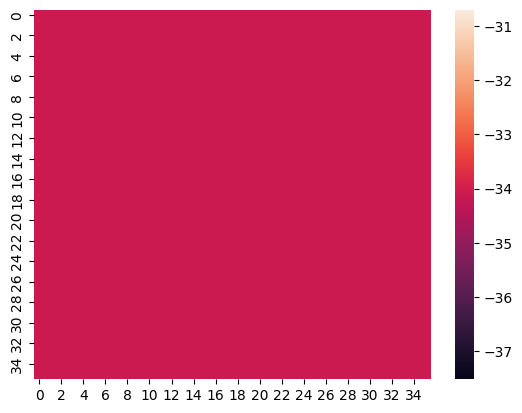

In [193]:
sns.heatmap(np.log(estimated_matrices[0][0]))

In [164]:
learned = ContinuousValuedOOM.from_data(
    train_data,
    target_dimension     = d1,
    len_cwords           = len_ciw,
    len_iwords           = len_ciw,
    membership_functions = mfs,
    observables          = source_oom.observables,
    estimated_matrices   = estimated_matrices
)

  0%|▏                                                                        | 3018/1065127 [00:43<4:15:21, 69.32it/s]


KeyboardInterrupt: 